## Observations and Insights 

1. Capomulin and Ramicane treatment regimens had the most mice in comparison to the other regimens, as seen in the bar graphs. 
2. Looking at the box plot, Capomulin and Ramicane had the smallest tumors by volume. 
3. The gender distribution was equal between male and female, however the role of gender in tumor growth and treatment remains unknown. I would look at the tumor volume per regimen grouped by gender. There may be a medication more suitable for one gender over the other, or each gender may process and react differently. 
4.  By examinging multiple randomly selected test subjects over the course of the the study, Capomulin was successful in shrinking the tumors. The drug began taking effect between day 5 and day 10 when the tumors started to decreased. However, it appears the treatment lost effectiveness around day 35 and the tumors started to increase in volume. Future studies should consider incremently increasing the dosage over time to ensure complete ablation of the tumors.  
5. There is a positive correlation of 0.84 between the weight of the mouse and volume of the tumors as demostrated by the linear regression model. This correlation was expected since any increase in volume will influence the mass of the object, thus influencing the weight of the mouse. This is not indicative to the efficiency of the drug regimens. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")
combined_df.to_csv("combined_df.csv", index=False)
# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice=len(mouse_metadata["Mouse ID"].unique())
mice

249

Issue: How do we know there's a duplicate in the first place when the instructions tell us 249 mice were used in the study and 249 mice are shown in the mouse_metadata and study_results. Simply looking at the number of mice won't work! The mice themselves aren't being duplicated nor was the same Mouse ID used for two mice since the weights and ages are the same. The data collection records is being duplicated. 
Thus, the number of timepoints used (10) and the value counts of each Mouse ID is needed. Then, anything over the max number of time_points would be a duplicate, that is if all the mice reached the 45 day mark, which some do not. 

In [3]:
study_record = study_results["Mouse ID"].value_counts()
study_record

g989    13
p136    10
c757    10
q787    10
e476    10
        ..
u153     1
v199     1
o848     1
f932     1
d133     1
Name: Mouse ID, Length: 249, dtype: int64

In [4]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = study_results.loc[study_results.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].value_counts()
duplicates

g989    5
Name: Mouse ID, dtype: int64

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouse_data=combined_df.loc[combined_df["Mouse ID"] == "g989"]
duplicated_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_df.drop(combined_df.loc[combined_df["Mouse ID"]== "g989"].index, inplace=True)
combined_df.to_csv("cleaned_combined_df.csv", index=False)
# Checking the number of mice in the clean DataFrame.
mice_check = len(combined_df["Mouse ID"].unique())
mice_check

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and standard error of mean(SEM) of the tumor volume for each regimen.
# This method is the most straighforward, creating multiple series and putting them all together at the end.

mean = combined_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median = combined_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance = combined_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
std_var = combined_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sem = combined_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

summary_by_series_df = pd.DataFrame ({
"Mean": mean,
"Median": median,
"Variance": variance,
"Standard Variation": std_var,
"SEM": sem})

summary_by_series_df.style.format({
"Mean": "{:,.2f}",
"Median": "{:,.2f}",
"Variance": "{:,.2f}",
"Standard Variation": "{:,.2f}",
"SEM": "{:,.2f}"})

,Mean,Median,Variance,Standard Variation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen.
# This method produces everything in a single groupby function
group = combined_df.groupby("Drug Regimen")

summary_single_group_df = pd.DataFrame(group.agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"])

stylish_summary = summary_single_group_df.style.format({
"mean": "{:,.2f}",
"median": "{:,.2f}",
"var": "{:,.2f}",
"std": "{:,.2f}",
"sem": "{:,.2f}"})

stylish_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

NameError: name 'x_axis' is not defined

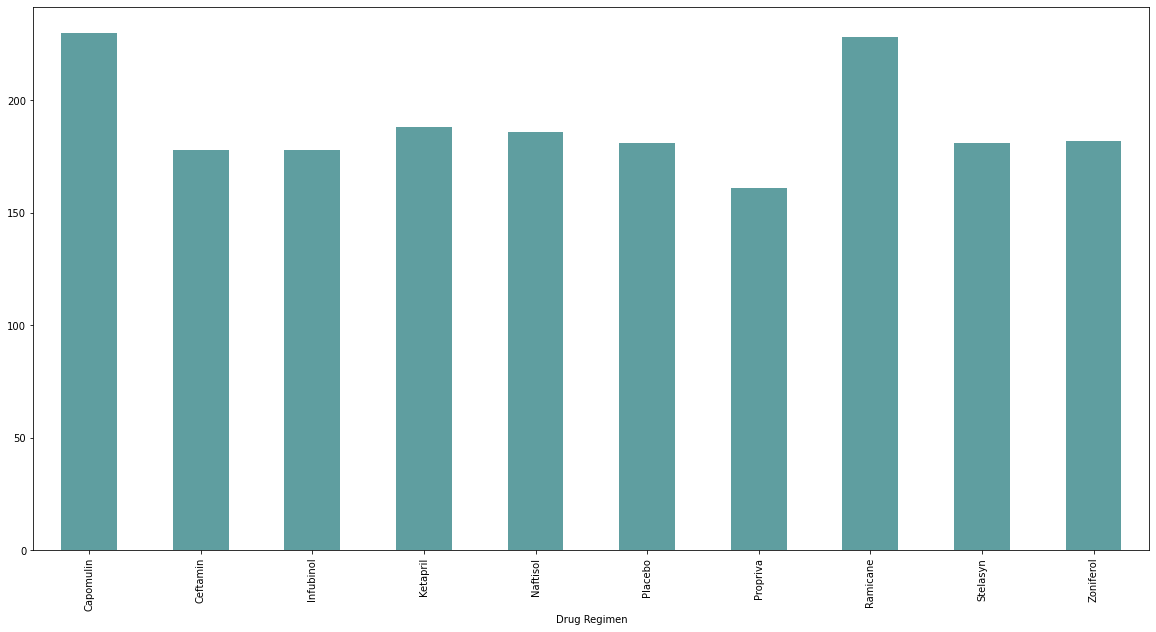

In [7]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_by_treatment = combined_df.groupby(["Drug Regimen"]).count()["Mouse ID"] 

plot_pandas = mice_by_treatment.plot.bar(figsize=(20,10), color="cadetblue", alpha=1, align="center")
tick_labels = [value for value in x_axis]
plt.xticks(rotation="horizontal", fontsize = 14)
plt.xlabel("Drug Regimen", fontsize = 16)
plt.ylabel("Number of Mice", fontsize = 16)
plt.title("Number of Mice per Treatment", fontsize = 20)

plt.savefig("Bar_plot[Pandas]--Number of Mice per Treatment")
plt.show()

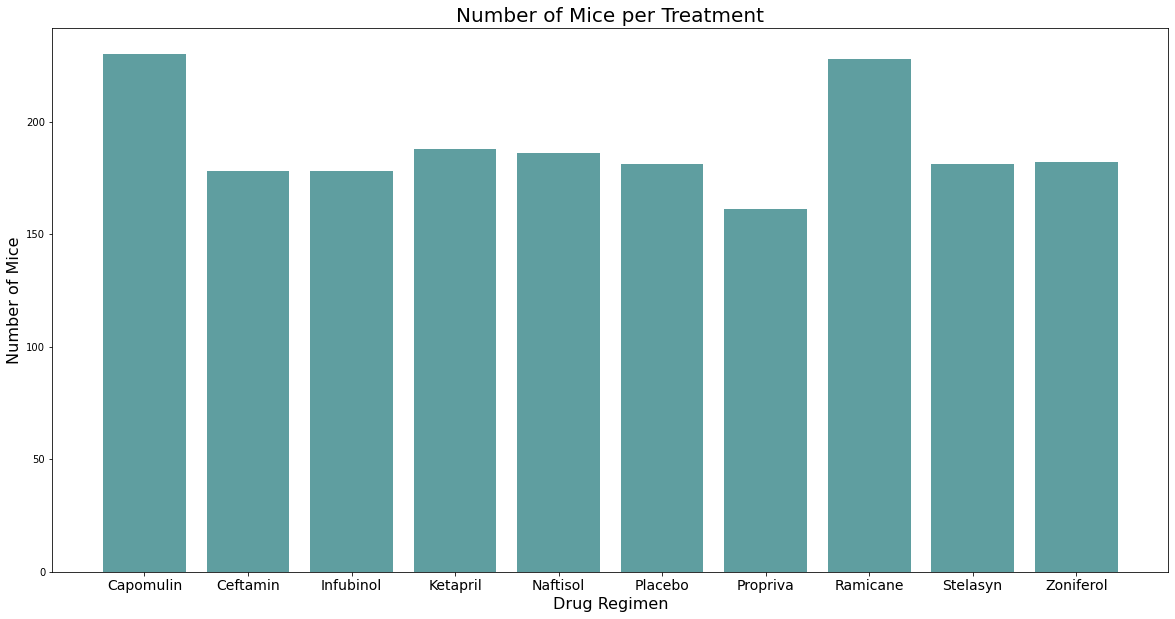

In [8]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
the_mice =(combined_df.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()

x_axis = np.arange(len(mice_by_treatment))
fig1, ax1 = plt.subplots(figsize=(20, 10))
plt.bar(x_axis, the_mice, color="cadetblue", alpha=1, align="center")
tick_labels = [value for value in x_axis]
plt.xticks(tick_labels, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"],  rotation="horizontal", fontsize = 14)
plt.xlabel("Drug Regimen", fontsize = 16)
plt.ylabel("Number of Mice", fontsize = 16)
plt.title("Number of Mice per Treatment", fontsize = 20)

plt.savefig("Bar_plot[PyPlot]--Number of Mice per Treatment")
plt.show()


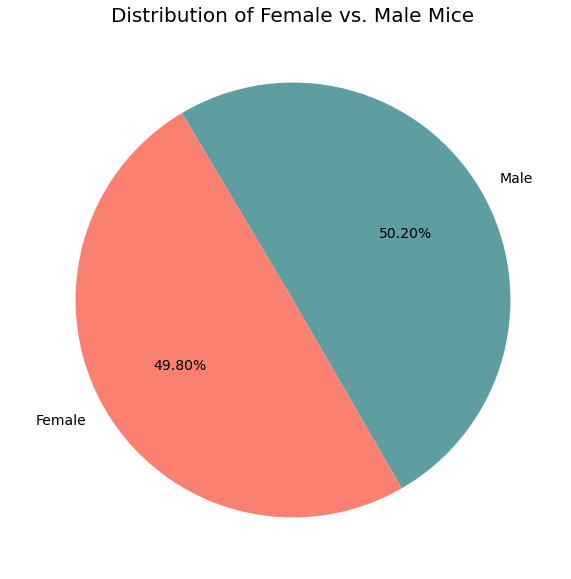

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#Set up Dataframe for Gender of mice
gender = pd.DataFrame(combined_df.groupby("Mouse ID" )["Sex"].unique())
gender.reset_index(inplace = True) 
#Find values
m_v_f = pd.DataFrame(gender["Sex"].value_counts())
m_v_f.reset_index(inplace = True)

#Change column headers to reflect data "axes"
m_v_f.columns = ["Sex", "Mouse Count"]
m_v_f["Sex"] = m_v_f["Sex"].str[0]
panda_pie = m_v_f.plot(kind = "pie", y = "Mouse Count", autopct = '%.2f%%', labels = ["Male", "Female"], legend = False, startangle = 300,
title = ("Distribution of Female vs. Male Mice"), shadow = False, figsize = (15, 10), colors = ["cadetblue", "salmon"], textprops= {"fontsize":14})
panda_pie.title.set_size(20)
panda_pie.set_ylabel(' ')
panda_pie

plt.savefig("Pie_plot[Pandas]--Gender Distribution of Test Subjects.png")

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create Labels for the sections of the pie
gender_labels = m_v_f["Sex"]
gender_sizes = m_v_f["Mouse Count"]

#Create the pie chart based upon the values 
plt.fig1, ax1 = plt.subplots(figsize = (15, 10))
plt.pie(gender_sizes, labels = gender_labels , colors = ["cadetblue", "salmon"], autopct = "%.2f%%", shadow=False, startangle=300, textprops= {"fontsize":14})
plt.title("Gender Distribution of Test Subjects", fontsize = 20)

plt.savefig("Pie_plot[PyPlot]--Gender Distribution of Test Subjects")
plt.show()

NameError: name 'm_v_f' is not defined

## Quartiles, Outliers and Boxplots

In [10]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:Capomulin, Ramicane, Infubinol, and Ceftamin

#Locate/Seperate data by drug regimen and create dataframe for each to work with
Capomulin_df = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = combined_df.loc[combined_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = combined_df.loc[combined_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = combined_df.loc[combined_df["Drug Regimen"] == "Ceftamin", :]

### Capomulin

In [15]:
# Get last (greatest) timepoint for each mouse
Capomulin_lastTP = Capomulin_df.groupby("Mouse ID").max()["Timepoint"]

# Calculate final tumor volume of each mouse:  
Capomulin_final_vol = pd.DataFrame(Capomulin_lastTP)

# Merge this grouped dataframef with the original dataframe to get tumor volume at the last timepoint
Capomulin_merge = pd.merge(Capomulin_final_vol, combined_df, on=("Mouse ID","Timepoint"), how="left")
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

# Quartiles & Interquartile Range:
quartiles = Capomulin_tumors.quantile([0.25,0.5,0.75])
lowerqr = round(quartiles[0.25], 2)
median =  round(quartiles[0.5], 2)
upperqr = round(quartiles[0.75], 2)
interqr = round(upperqr-lowerqr, 2)

# Outliers:
lower_bound = round(lowerqr - (1.5 * interqr), 2)
upper_bound = round(upperqr + (1.5 * interqr), 2)

# Output:
print(f"The lower quartile for Capomulin tumors: {lowerqr}")
print(f"The upper quartile for Capomulin tumors: {upperqr}")
print(f"The interquartile range for Capomulin tumors: {interqr}")
print(f"The median for Capomulin tumors: {median} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile for Capomulin tumors: 32.38
The upper quartile for Capomulin tumors: 40.16
The interquartile range for Capomulin tumors: 7.78
The median for Capomulin tumors: 38.13 
Values below 20.71 could be outliers.
Values above 51.83 could be outliers.


### Ramicane

In [11]:
# Get last (greatest) timepoint for each mouse:
Ramicane_lastTP = Ramicane_df.groupby("Mouse ID").max()["Timepoint"]

# Calculate final tumor volume of each mouse:  
Ramicane_final_vol = pd.DataFrame(Ramicane_lastTP)
Ramicane_merge = pd.merge(Ramicane_final_vol, combined_df, on=("Mouse ID","Timepoint"), how="left")
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]

# Quartiles & Interquartile Range:
quartiles = Ramicane_tumors.quantile([0.25,0.5,0.75])
lowerqr = round(quartiles[0.25], 2)
median = round(quartiles[0.5], 2)
upperqr = round(quartiles[0.75], 2)
interqr = round(upperqr - lowerqr, 2)

#Outliers:
lower_bound = round(lowerqr - (1.5 * interqr), 2)
upper_bound = round(upperqr + (1.5 * interqr), 2)

#Output:
print(f"The lower quartile of Ramicane tumors is: {lowerqr}")
print(f"The upper quartile of Ramicane tumors is: {upperqr}")
print(f"The interquartile range of Ramicane tumors is: {interqr}")
print(f"The median of Ramicane tumors is: {median}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumors is: 31.56
The upper quartile of Ramicane tumors is: 40.66
The interquartile range of Ramicane tumors is: 9.1
The median of Ramicane tumors is: 36.56
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.


### Infubinal

In [17]:
# Get last (greatest) timepoint for each mouse:
Infubinol_lastTP = Infubinol_df.groupby("Mouse ID").max()["Timepoint"]

# Calculate final tumor volume of each mouse:  
Infubinol_final_vol = pd.DataFrame(Infubinol_lastTP)
Infubinol_merge = pd.merge(Infubinol_final_vol, combined_df, on=("Mouse ID","Timepoint"), how="left")
Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]

# Quartiles & Interquartile Range:
quartiles = Infubinol_tumors.quantile([0.25,0.5,0.75])
lowerqr = round(quartiles[0.25],2)
median = round(quartiles[0.5], 2)
upperqr = round(quartiles[0.75], 2)
interqr = round(upperqr - lowerqr, 2)

# Outliers:
lower_bound = round(lowerqr - (1.5 * interqr), 2)
upper_bound = round(upperqr + (1.5 * interqr), 2)

# Output:
print(f"The lower quartile of Infubinol tumors is: {lowerqr}")
print(f"The upper quartile of Infubinol tumors is: {upperqr}")
print(f"The interquartile range of Infubinol tumors is: {interqr}")
print(f"The median of Infubinol tumors is: {median}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol tumors is: 54.05
The upper quartile of Infubinol tumors is: 65.53
The interquartile range of Infubinol tumors is: 11.48
The median of Infubinol tumors is: 60.17
Values below 36.83 could be outliers.
Values above 82.75 could be outliers.


### Ceftamin

In [12]:
# Get last (greatest) timepoint for each mouse:
Ceftamin_lastTP = Ceftamin_df.groupby("Mouse ID").max()["Timepoint"]

# Calculate final tumor volume of each mouse:
Ceftamin_final_vol = pd.DataFrame(Ceftamin_lastTP)
Ceftamin_merge = pd.merge(Ceftamin_final_vol, combined_df, on=("Mouse ID","Timepoint"), how="left")
Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]

# Quartiles & Interquartile Range:
quartiles = Ceftamin_tumors.quantile([0.25,0.5,0.75])
lowerqr = round(quartiles[0.25], 2)
median = round(quartiles[0.25], 2)
upperqr = round(quartiles[0.75], 2)
interqr = round((upperqr - lowerqr), 2)

# Outliers:
lower_bound = round(lowerqr - (1.5 * interqr), 2)
upper_bound = round(upperqr + (1.5 * interqr), 2)

#Output:
print(f"The lower quartile of treatment is: {lowerqr}")
print(f"The upper quartile of temperatures is: {upperqr}")
print(f"The interquartile range of temperatures is: {interqr}")
print(f"The the median of temperatures is: {median}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of treatment is: 48.72
The upper quartile of temperatures is: 64.3
The interquartile range of temperatures is: 15.58
The the median of temperatures is: 48.72
Values below 25.35 could be outliers.
Values above 87.67 could be outliers.


### Boxplot

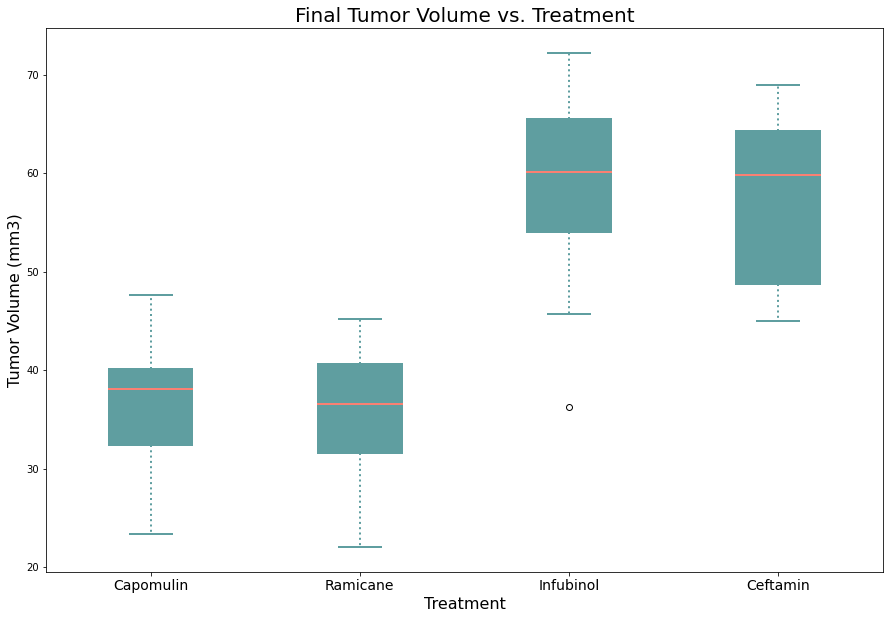

In [19]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
vol_data = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title("Final Tumor Volume vs. Treatment", fontsize = 20)
ax1.set_ylabel("Tumor Volume (mm3)", fontsize = 16)
ax1.set_xlabel("Treatment", fontsize = 16)
bp=ax1.boxplot(vol_data, labels = treatment, widths = 0.4, patch_artist=True, vert=True)

for box in bp["boxes"]:
    box.set(color="cadetblue", linewidth=2)
    box.set(facecolor = "cadetblue")
for median in bp["medians"]: 
    median.set(color ="salmon", linewidth = 2)
for whisker in bp["whiskers"]: 
    whisker.set(color ="cadetblue", linewidth = 2, linestyle =":")
for cap in bp["caps"]: 
    cap.set(color ="cadetblue", linewidth = 2) 
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"], fontsize = 14)

plt.savefig("Box_plot--Final Tumor Volume vs. Treatment.png")
plt.show()

## Line and Scatter Plots

In [13]:
# Generate a line plot of time point/x-axis and versus tumor volume/y-axis for a mouse treated with Capomulin

#Randomly select mouse -- manually selecting a mouse would show bias towards mice exhibiting the greatest decrease in tumor volume. 
#I have avoided such bias by randomly selecting a sample from the mice treated with Capomulin based on the Mouse ID. 
sample_selection = Capomulin_df.sample(n=1)
random_mouse = sample_selection["Mouse ID"].values[0]
print(f"Random sample selection: {random_mouse}")

#Make Dataframe of "random_mouse" data 
sample_mouse = pd.DataFrame(Capomulin_df.loc[Capomulin_df["Mouse ID"] == random_mouse,:])
sample_mouse

Random sample selection: r944


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
381,r944,Capomulin,Male,12,25,0,45.000000,0
382,r944,Capomulin,Male,12,25,5,45.737145,0
383,r944,Capomulin,Male,12,25,10,46.544292,0
384,r944,Capomulin,Male,12,25,15,47.373423,0
385,r944,Capomulin,Male,12,25,20,43.225671,1
386,r944,Capomulin,Male,12,25,25,41.086991,1
387,r944,Capomulin,Male,12,25,30,41.680791,1
388,r944,Capomulin,Male,12,25,35,40.401765,2
389,r944,Capomulin,Male,12,25,40,41.042045,2
390,r944,Capomulin,Male,12,25,45,41.581521,2


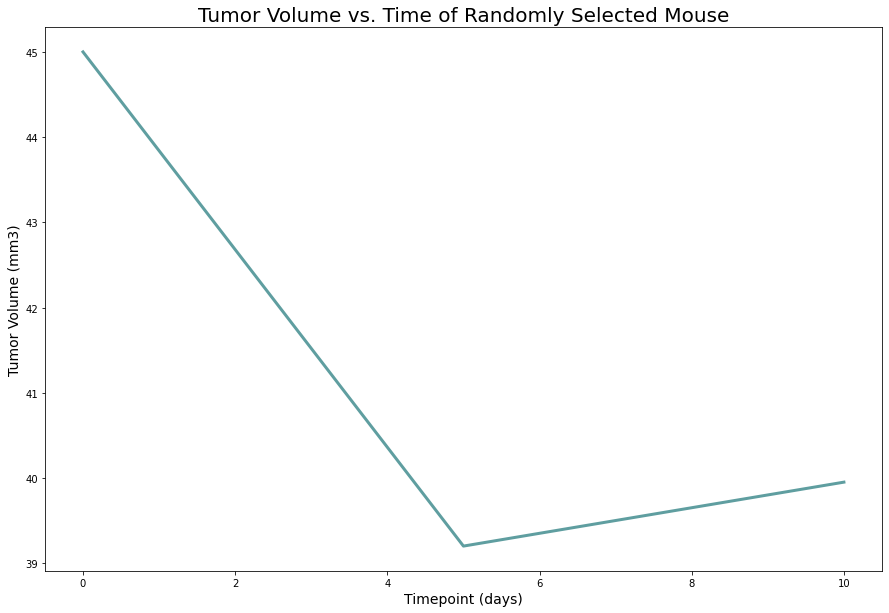

In [25]:
#line_plot
x_axis = sample_mouse["Timepoint"]
y_axis = sample_mouse["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize = (15, 10))
plt.plot(x_axis, y_axis, linewidth = 3, color = "cadetblue")
plt.title("Tumor Volume vs. Time of Randomly Selected Mouse", fontsize =20)
plt.xlabel("Timepoint (days)", fontsize = 14)
plt.ylabel("Tumor Volume (mm3)", fontsize = 14)

plt.savefig("Line_plot--Tumor Volumn vs. Time of Random Mouse.png")
plt.show()

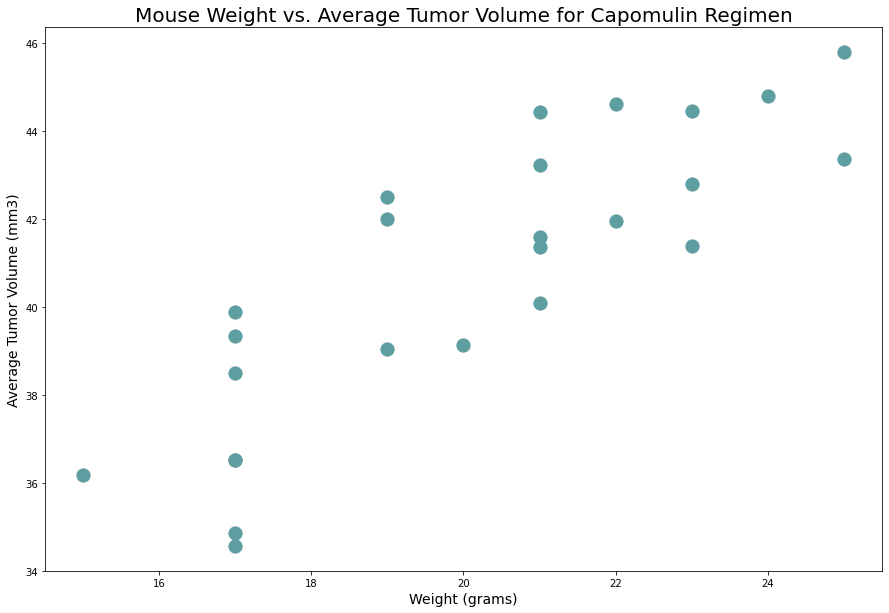

In [14]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

fig1, ax1 = plt.subplots(figsize = (15, 10))
scatter_plt = Capomulin_df.groupby(["Mouse ID"]).mean()
plt.scatter(scatter_plt["Weight (g)"], scatter_plt["Tumor Volume (mm3)"], s = 175, color = "cadetblue")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen", fontsize =20)
plt.xlabel("Weight (grams)", fontsize = 14)
plt.ylabel("Average Tumor Volume (mm3)", fontsize = 14)

plt.savefig("Scatter_plot--Mouse Weight vs. Average Tumor Volume for Capomulin.png")
plt.show()

## Correlation and Regression

The correlation between the mouse weight and the average tumor volume is 0.84
The slope of the linear regression model is: 0.95
The intercept of the linear regression model is: 21.55


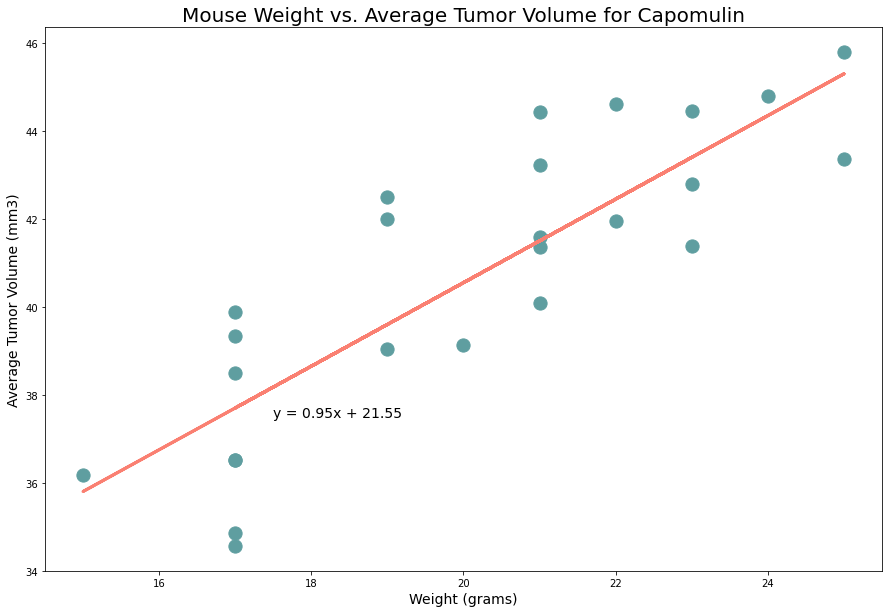

In [15]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

#correlation coefficient
corr_co = round(st.pearsonr(scatter_plt["Weight (g)"], scatter_plt["Tumor Volume (mm3)"])[0],2)
print(f"The correlation between the mouse weight and the average tumor volume is {corr_co}")

slope, intercept, r_value, p_value, std_err = st.linregress(scatter_plt['Weight (g)'], scatter_plt['Tumor Volume (mm3)'])
plt_slope = round(slope, 2)
plt_intercept = round(intercept, 2)

print(f"The slope of the linear regression model is: {plt_slope}")
print(f"The intercept of the linear regression model is: {plt_intercept}")

fig1, ax1 = plt.subplots(figsize = (15, 10))
y_values = scatter_plt["Weight (g)"] * plt_slope + plt_intercept
plt.scatter(scatter_plt["Weight (g)"], scatter_plt["Tumor Volume (mm3)"], s = 175, color = "cadetblue")
plt.plot(scatter_plt['Weight (g)'], y_values, linewidth = 3, color = "salmon")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin", fontsize = 20)
plt.xlabel("Weight (grams)", fontsize = 14)
plt.ylabel("Average Tumor Volume (mm3)", fontsize = 14)
equation = "y = " + str(plt_slope) + "x" " + " + str(plt_intercept)
plt.text(17.5, 37.5, equation, fontsize = 14)

plt.savefig("Linear_Regression_Model.png")
plt.show()

## Sources

* https://appdividend.com/2020/03/07/python-pandas-find-duplicate-rows-in-dataframe-based-on-all-or-selected-columns/#:~:text=duplicated()%20is%20an%20inbuilt,columns%2C%20then%20use%20the%20pandas.
* https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/
* https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value
* https://stackoverflow.com/questions/35582531/pandas-subplot-title-size-in-ipython-notebook
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.SeriesGroupBy.aggregate.html
* https://matplotlib.org/gallery/statistics/boxplot_demo.html
* https://matplotlib.org/2.0.2/api/colors_api.html
* https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/#:~:text=Creating%20Box%20Plot&text=pyplot%20module%20of%20matplotlib%20library,we%20can%20create%20box%20plots.&text=The%20data%20values%20given%20to,box%20plot%20by%20using%20numpy.
*https://www.geeksforgeeks.org/python-pandas-dataframe-get_value/
*https://pythonspot.com/matplotlib-scatterplot/
*https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
*https://towardsdatascience.com/simple-and-multiple-linear-regression-with-python-c9ab422ec29c
*https://moonbooks.org/Articles/How-to-calculate-the-slope-and-the-intercept-of-a-straight-line-with-python-/
*https://www.mathworks.com/matlabcentral/answers/64754-how-can-i-include-an-equation-in-a-scatter-plot-with-linear-regression-line
